Variance: 1.960000

-------------------------------------
--------- Emb: 0 ---------
n_pre_e: 3.240000
n: 0.160971
---- Clus Class: 1 ----
---- k: 0 ----
d_pre_e: 33.640000
d: 0.000188
--------
d_cls_sum: 0.000188
------------
d_sum: 0.000188
pre_ln: 858.427340
ln: 6.755102
-ln: -6.755102
LOSS: 0.000000


-------------------------------------
--------- Emb: 1 ---------
n_pre_e: 0.040000
n: 0.364145
---- Clus Class: 1 ----
---- k: 0 ----
d_pre_e: 14.440000
d: 0.025130
--------
d_cls_sum: 0.025130
------------
d_sum: 0.025130
pre_ln: 14.490154
ln: 2.673469
-ln: -2.673469
LOSS: 0.000000


-------------------------------------
--------- Emb: 2 ---------
n_pre_e: 2.560000
n: 0.191463
---- Clus Class: 0 ----
---- k: 0 ----
d_pre_e: 5.760000
d: 0.230066
--------
d_cls_sum: 0.230066
------------
d_sum: 0.230066
pre_ln: 0.832208
ln: -0.183673
-ln: 0.183673
LOSS: 0.183673


-------------------------------------
--------- Emb: 3 ---------
n_pre_e: 0.040000
n: 0.364145
---- Clus Class: 0 ----
----

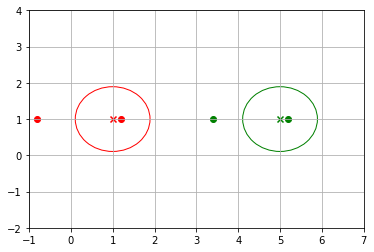

In [80]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

cluster_centroids = [[[1, 1]], [[1, 5]]]
embs = [[[1, -.8], [1, 1.2]], [[1, 3.4], [1, 5.2]]]
emb_clus_ass = [[0, 0], [0, 0]]
alpha = 1

colors = ['r','g','b']

# Non-squared basic euc dist ||a-b||_2
def euc_dist(a,b):
    return np.linalg.norm(np.array(a)-np.array(b))
    
# Plot
fig, ax = plt.subplots()
ax.set_xlim((-1, 7))
ax.set_ylim((-2, 4))
plt.grid()
for c in range(len(embs)):
    for cc in cluster_centroids[c]:
        plt.scatter(cc[1], cc[0], marker='x', color=colors[c])
        ax.add_artist(Circle((cc[1], cc[0]), radius=(alpha*variance), color=colors[c], fill=False))
    for e in embs[c]:
        plt.scatter(e[1], e[0], color=colors[c])


############## Magnet Loss ##############

# Calc Variance
variance = 0
N = 0
for c in range(len(embs)):
    for ei in range(len(embs[c])):
        variance += euc_dist(embs[c][ei],cluster_centroids[c][emb_clus_ass[c][ei]])**2
        N += 1
variance = variance / (N-1)
# variance = .5
print("Variance: %f" % variance)

for c in range(len(embs)):
    for ei in range(len(embs[c])):
        n_pre_e = euc_dist(embs[c][ei],cluster_centroids[c][emb_clus_ass[c][ei]])**2
        n = np.exp((-1/(2*variance))*n_pre_e - alpha)
        print("")
        print("-------------------------------------")
        print("--------- Emb: %d ---------" % ((c*len(embs[c]))+ei))
        print("n_pre_e: %f" % n_pre_e)
        print("n: %f" % n)
        
        d_sum = 0
        for ci in range(len(cluster_centroids)):
            if c == ci:  # only classes not the same as emb we doing
                continue
                
            d_cls_sum = 0
            print("---- Clus Class: %d ----" % ci)
            for k in range(len(cluster_centroids[ci])):
                print("---- k: %d ----" % k)
                d_pre_e = euc_dist(embs[c][ei], cluster_centroids[ci][emb_clus_ass[ci][k]])**2
                d = np.exp((-1/(2*variance))*d_pre_e)
                d_cls_sum += d
                print("d_pre_e: %f" % d_pre_e)
                print("d: %f" % d)
                print("--------")
            print("d_cls_sum: %f" % d_cls_sum)
            d_sum += d_cls_sum
            
        print("------------")
        print("d_sum: %f" % d_cls_sum)
        
        pre_ln = n/d_sum
        print("pre_ln: %f" % pre_ln)
        
        ln = -np.log(pre_ln)
        print("ln: %f" % -ln)
        print("-ln: %f" % ln)
        
        relu = max(0, ln)
        print("LOSS: %f" % relu)
        print()
        